In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np

## Task 1: look over the data

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2

Task 2.1 -- boxplot
For the "Median value of owner-occupied homes" provide a boxplot

Task 2.2 -- bar plot
Provide a  bar plot for the Charles river variable

Task 2.3 -- boxplot                   
Provide a boxplot for the MEDV variable vs the AGE variable.
(Discretize the age variable into three groups:
1) of 35 years and younger,
2) between 35 and 70 years,
3) 70 years and older

Task 2.4 -- scatter plot
Provide a scatter plot to show the relationship between Nitric oxide concentrations
and the proportion of non-retail business acres per town.
|_____> What can you say about the relationship? 

Task 2.5 -- histogram
Create a histogram for the pupil to teacher ratio variable

## Task 3

### ______ Be sure to:
-> State your hypothesis.
-> Use α = 0.05
-> Perform the test Statistics.
-> State the conclusion from the test.

In [ ]:
Task 3.1 -- (T-test for independent samples)
Is there a significant difference in median value of houses bounded by the Charles river or not? 

|___> Conclusion 
> H1 -- There is a correlation between the distance from the river as per house value
> The houses near the river have a higher median value, than those farther away.
-----------------------------------

Task 3.2 -- (ANOVA)
Is there a difference in Median values of houses (MEDV)
    for each proportion of owner occupied units built prior to 1940 (AGE)? 

|___> Conclusion
> H1 -- The house median values do relate to AGE of the home
> The median value of newer homes are higher than the ones build prior to 1940.
-----------------------------------

Task 3.3 -- (Pearson Correlation)
Can we conclude that there is no relationship between Nitric oxide concentrations and
    proportion of non-retail business acres per town? (Pearson Correlation)

|___> Conclusion 
> H1 -- There is a relationship between high acres & high NOX.
> The NOX concentrations are higher the more acres the towns have.
-----------------------------------

Task 3.4 --(Regression analysis)
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 

|___> Conclusion 
> H1 -- There is a effect on home values depending on the distance from the employment centres
> The home values increases the farther away from the employment centres.   
-----------------------------------


In [8]:
boston_df=pd.read_csv("C:\\Users\\jesus\\Downloads\\boston_housing.csv")

In [ ]:
Task 2.1 -- boxplot
For the "Median value of owner-occupied homes" provide a boxplot

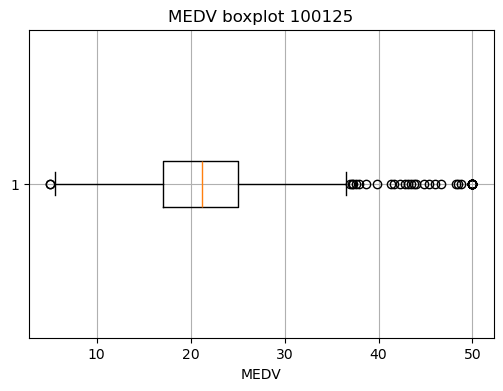

In [3]:
#1.1 Create the boxplot
plt.figure(figsize=(6,4))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('MEDV boxplot 100125')
plt.xlabel('MEDV')
plt.grid(True)
plt.show()

In [ ]:
Task 2.2 -- bar plot
Provide a  bar plot for the Charles river variable

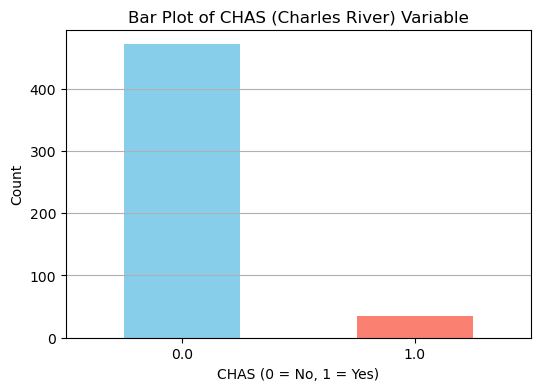

In [4]:
#2.1 Count values in 'CHAS'
chas_counts = boston_df['CHAS'].value_counts().sort_index()

#2.2 create the bar plot
plt.figure(figsize=(6, 4))
chas_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Bar Plot of CHAS (Charles River) Variable')
plt.xlabel('CHAS (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
Task 2.3 -- boxplot                   
Provide a boxplot for the MEDV variable vs the AGE variable.
(Discretize the age variable into three groups:
1) of 35 years and younger,
2) between 35 and 70 years,
3) 70 years and older

<Figure size 800x600 with 0 Axes>

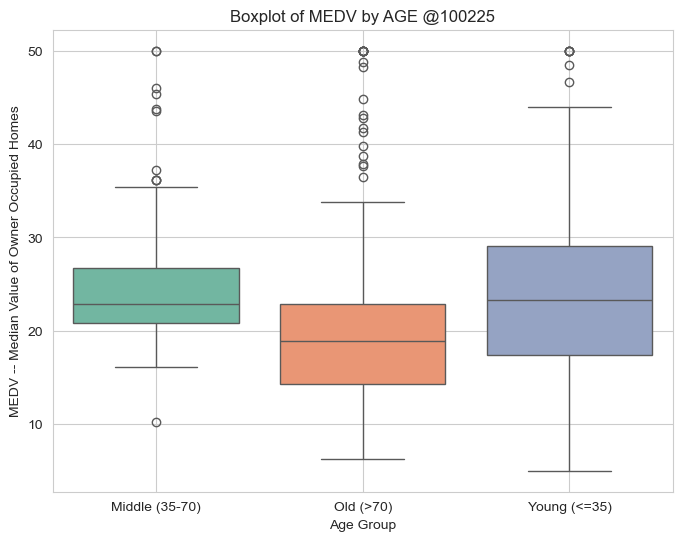

In [7]:
# Set white background
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), facecolor='white')

# Create age group categories
def age_group(age):
    if str(age) <= str(35):
        return 'Young (<=35)'
    elif str(age) < str(70):
        return 'Middle (35-70)'
    else:
        return 'Old (>70)'

boston_df['AGE'] = boston_df['AGE'].apply(age_group)

#3.1 Create the boxplot
plt.figure(figsize=(8,6))

sns.boxplot(x='AGE', y='MEDV', hue='AGE', data=boston_df, palette='Set2', legend=False)

plt.title('Boxplot of MEDV by AGE @100225')
plt.xlabel('Age Group')
plt.ylabel('MEDV -- Median Value of Owner Occupied Homes')
plt.grid(True)
plt.legend([],[], frameon=False)

plt.show()

In [ ]:
Task 2.4 -- scatter plot
Provide a scatter plot to show the relationship between Nitric oxide concentrations
and the proportion of non-retail business acres per town.
|_____> What can you say about the relationship? 

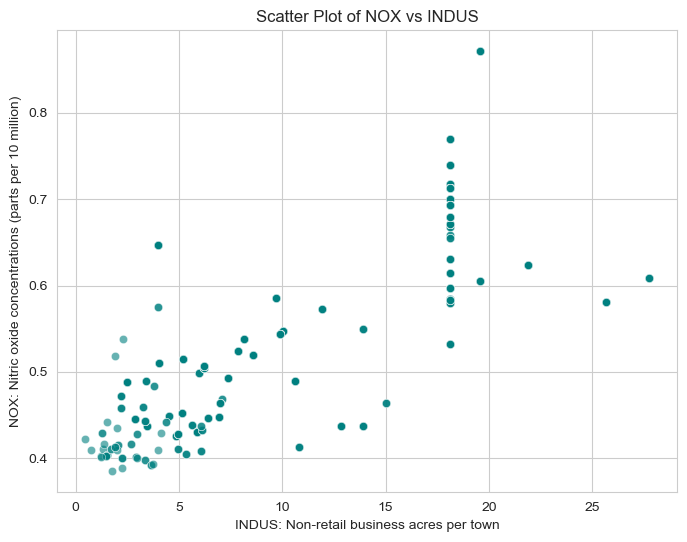

In [8]:
# Scatter plot: NOX vs INDUS
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='teal', alpha=0.6, edgecolors='w', linewidth=0.5)

# Labels and title
plt.xlabel('INDUS: Non-retail business acres per town')
plt.ylabel('NOX: Nitric oxide concentrations (parts per 10 million)')
plt.title('Scatter Plot of NOX vs INDUS')
plt.grid(True)

plt.show()

In [ ]:
Task 2.5 -- histogram
Create a histogram for the pupil to teacher ratio variable

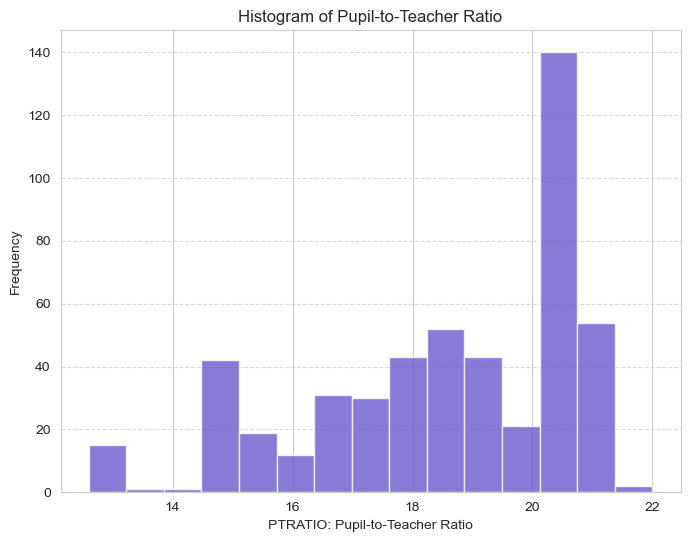

In [9]:
# Histogram: PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='slateblue', edgecolor='white', alpha=0.8)

# Labels and title
plt.xlabel('PTRATIO: Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

TASK 3

### Task 3.1 -- (T-test for independent samples)
### Is there a significant difference in (MEDV) median value of houses bounded by the (CHAS)Charles river or not? 

### 3.1 --> Split MEDV by CHAS groups using T-test

In [9]:
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform Welch's t-test (does not assume equal variance)
t_stat, p_value = ttest_ind(medv_chas0, medv_chas1, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")       # -3.1133
print(f"P-value: {p_value:.4f}")          # .0036

T-statistic: -3.1133
P-value: 0.0036


- Low p-value (< 0.05): Significant difference in MEDV between CHAS groups.
- High p-value (≥ 0.05): No significant difference

In [ ]:
|------> Conclusion
|------------------
> H1 -- There is a correlation between the distance from the river as per house value
> The houses near the river have a higher median value, than those farther away.
> The P-value .0036 shows significant difference between the CHAS groups & the non CHAS.
> Reject the null H0

### Task 3.2 -- (ANOVA)
### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

In [10]:
# Define bins and labels
bins = [0, 35, 70, 100]
labels = ['Newer Homes', 'Mid-Age Homes', 'Older Homes']

# Apply binning
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

In [14]:
# Group MEDV by AGE_group
groups = [boston_df[boston_df['AGE_group'] == label]['MEDV'] for label in labels]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 36.4076
P-value: 0.0000


In [17]:
# defined
str1006 = "The F-statistic compares two types of variation: \n- Between-group variation (how much the group means differ from each other) \n- Within-group variation (how much individual values vary within each group)"
print(str1006)

The F-statistic compares two types of variation: 
- Between-group variation (how much the group means differ from each other) 
- Within-group variation (how much individual values vary within each group)


In [ ]:
|------> Conclusion
|------------------
> H1 -- The house median values do relate to AGE of the home

|___> With a p-value < .05, shows a strong argument against the null H0.

|___> The median value of newer homes are higher than the ones build prior to 1940.
|___> Median values of newer homes are higher, than the other groups, 
|___> There are many older homes that still have a large median value    

## Task 3.3 -- (Pearson Correlation)

### Can we conclude that there is no relationship between NOX -- Nitric oxide concentrations,
### and proportion of INDUS -- non-retail business acres per town? 

In [19]:
print('The correlation is saying that there is strong linear relationship\nbetween the INDUS acres going up & NOX increases')

The correlation is saying that there is strong linear relationship
between the INDUS acres going up & NOX increases


In [25]:

# Step 3: Compute Pearson correlation between NOX and INDUS
correlation = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')
print(f"Pearson correlation between NOX and INDUS: {correlation:.4f}")


Pearson correlation between NOX and INDUS: 0.7637


### Pearson correlation coefficient (ρ) ranges from –1 to +1.
### A value of 0.7637 indicates a strong positive linear relationship between:
### NOX: Nitric oxide concentration (air pollution)
### INDUS: Proportion of non-retail industrial land per town

In [ ]:
|------> Conclusion
|------------------
> H1 -- There is a relationship between high acres & high NOX.
> The NOX concentrations are higher the more acres the towns have.

## Task 3.4 -- (Regression analysis)

### What is the impact of an additional DIS -- weighted distance to the five Boston employment centres,
### on the MEDV --median value of owner occupied homes? 

In [ ]:
|------> Conclusion
|------------------
> H1 -- There is a impact on distance & value of homes 
--> Regression equation: MEDV = 18.39 + 1.09 * DIS
--> R-squared: 0.0625
|___> Only 6.25% of the variation in home values (MEDV) is explained by distance to employment centers (DIS).
|___> The farther away the distance from the centres, the more the values increase
